## Question #1 (50 points)

***This question consists of plotting and a conceptual question. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for anharmonically coupled oscillators, create a figure that superimposes

* a contour plot of the potential energy, and;
* the trajectory of $Q_1$ and $Q_2$.

### Point breakdown

* Contour plot (20 points)
* Trajectory plot (20 points)
* Physical explanation (10 points)

### The potential energy

$$ \Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2 $$

### Constrained parameters and initial conditions

Take $K_1 = 1$, $K_2 = 0.2$, $M_1 = M_2 = 1$, and $C=0.5$. For the initial conditions, take $Q_1(0) = 0$, $Q_2(0) = 1$, and both velocities starting at zero.

### Plotting constraints
Plot $Q_1$ and $Q_2$ on the horizontal and vertical axes, respectively. I suggest a meshgrid of at least $100 \times 100$ points.

For your contour plot, combine `plt.contour` and `plt.contourf` with code similar to the following:

* `plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='viridis')`
* `plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)`

Also, use `plt.xlim(-1.5, 1.5)` and `plt.ylim(-1.5, 1.5)`

Don't forget to label your axes.

### Getting and plotting the trajectory

To get the trajectory, you will need to set up and solve the equations of motion, as we did in previous homework and in class. Then you can plot $Q_2$ versus $Q_1$ with `matplotlib` using a line of code similar to `plt.plot(Q1, Q2, color='red', label="Trajectory")`.

Plot the trajectory from $t=0$ to $t=50$, with an appropriate choice of mesh points to ensure the trajectory is resolved. (e.g. `t_mesh = np.linspace(0, 50, 200)`)



### Physical explanation

With your code complete, you can test four cases for the initial conditions (all with the initial velocity set to zero):

1. $Q_1(0) = 0$, $Q_2(0) = 1$ (**submit this plot**)
2. $Q_1(0) = 0$, $Q_2(0) = -1$
3. $Q_1(0) = 1$, $Q_2(0) = 0$
4. $Q_1(0) = -1$, $Q_2(0) = 0$

Why do the dynamics differ when only $Q_1$ is initially displaced compared to when only $Q_2$ is initially displaced? How does this relate to the coupling term in the potential energy? What is the physical interpretation? You could use our cylindrical beam example from class to describe this, if you like.

#### Answer

First I'll describe what I see is going on. When $Q_2$ is initially displaced, the plot is, for lack of better vocabulary, spiraly and squiggly, like multiple figure 8's. When positive the lines move back and forth mostly horizontally and are pressed closer together, while making $Q_2$ negative seems to stretch out these spirals vertically, like pulling on a slinky.

In contrast, when $Q_1$ is initially displaced, it is always a straight horizontal line at y=0 and x=(-1, 1). 

The dynamics are most likely different due to the fact that $-\frac{dU}{dQ_1}$ and $-\frac{dU}{dQ_2}$ give different expressions, indicating that $Q_1$ and $Q_2$ are not symmetrical. It's also true that their constants are different, and it makes one wonder if the two would be more similar if the constants were equal for both terms. 

Most notably, the coupling term only squares $Q_2$, even though both $Q$'s are squared in their respective terms. Perhaps this is what causes $Q_2$'s strange behavior, since it causes there to be a factor of $Q_1Q_2$ in the $F_{Q_2}$ term. 

My best guess for what the physical interpretation of this system could be is that this is a system of two oscillators, one harmonic and one anharmonic. Based on the figure 8 movement, perhaps this system represents a system of two pendulums bound in a single system, where the first pendulum is more stable and harder to break out of equilibrium than the second, which is more free to swing about as it pleases, and brings the first pendulum along.


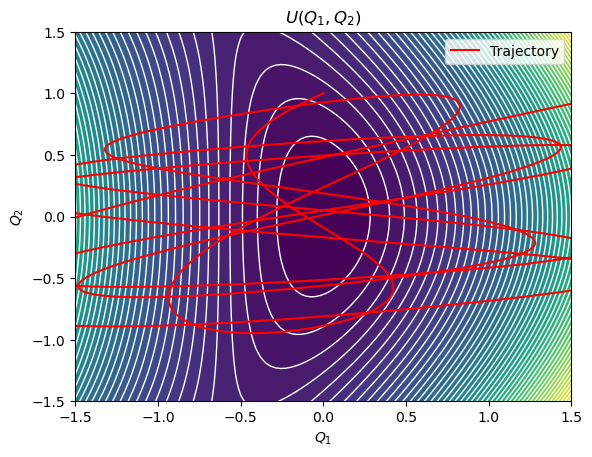

In [29]:
# libraries (copy paste)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# contour plot

# define functions

# def variables theyre lowercase bc im lazy
k1 = 1
k2 = 0.2
c = 0.5
m1 = 1
m2 = 1

def potential_energy(Q1, Q2, k1, k2, c):
    return 0.5*k1*Q1**2 + 0.5*k2*Q2**2 + 1/3 *c*Q1*Q2**2
    

# set up numbers
Q_max = 1.5
Q_min = -Q_max
q1 = np.linspace(Q_min, Q_max, 100)
q2 = np.linspace(Q_min, Q_max, 100)
Q1_grid, Q2_grid = np.meshgrid(q1, q2)
U_grid = potential_energy(Q1_grid, Q2_grid, k1, k2, c)

plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='viridis')
plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)
plt.xlim(Q_min, Q_max)
plt.ylim(Q_min, Q_max)
plt.title('$U(Q_1, Q_2)$')
plt.xlabel('$Q_1$')
plt.ylabel('$Q_2$')
#plt.show()

# trajectory plot, see below block for equations of motion calculations

# initial conditions
Q_10 = 0
Q_20 = 1
V_10 = 0
V_20 = 0

y0 = [Q_10, V_10, Q_20, V_20]

# equation of motion
def eq_motion(t, y, m1=1, m2=1, k1=1, k2=0.2, c=0.5):
    Q1, V1, Q2, V2 = y # unpack y
    dQ1_dt = V1
    dV1_dt = (-k1*Q1-(1/3)*Q2**2)/m1
    dQ2_dt = V2
    dV2_dt = (-k2*Q2-(2/3)*c*Q1*Q2**2)/m2
    return [dQ1_dt, dV1_dt, dQ2_dt, dV2_dt]
    #thanks mr sir for ur code


t_span = [0, 50]
t_eval = np.linspace(0, 50, 1000) #better overkill than underkill

# solve eqn of motion
potential_motion_sol = solve_ivp(eq_motion,
                                 t_span=t_span,
                                 y0=y0,
                                 method='RK45',
                                 t_eval=t_eval,
                                 args=(m1, m2, k1, k2,c)
                                )
# hey how do i get to look at the equation it made so i can check in desmos?

Q_sol_1 = potential_motion_sol.y[0]
V_sol_1 = potential_motion_sol.y[1]
Q_sol_2 = potential_motion_sol.y[2]
V_sol_2 = potential_motion_sol.y[3]
t_sol = potential_motion_sol.t

plt.plot(Q_sol_1, Q_sol_2, color='red', label="Trajectory") #...is it supposed to do that? it looks like spaghetti
#plt.plot(V_sol_1, V_sol_2, color='blue', label="im curious")

plt.legend()
plt.show()

# first: solve equations of motion
 $\dot{Q} = V$

 $\ddot{Q} = \dot{V}$
 
 $F_Q = -\frac{dU}{dQ}$
 
 $F_Q = m\ddot{Q}$

 but this is a 2 variable equation so we need $F_{Q_1}, F_{Q_2}$ and $\dot{Q_1}=V_1, \dot{Q_2}=V_2$

 $F_{Q_1} = -\frac{dU}{dQ_1} = m_1\ddot{Q_1}$

 $F_{Q_2} = -\frac{dU}{dQ_2} = m_2\ddot{Q_2}$

 $-\frac{dU}{dQ_1} = -K_1 Q_1 - \frac{1}{3} Q_2^2$

 $-\frac{dU}{dQ_2} = -K_2 Q_2 - \frac{2}{3} C Q_1 Q_2 $

 $F_{Q_1} = \dot{V_1} = -\frac{1}{m_1}(K_1 Q_1 - \frac{1}{3} Q_2^2)$

 $F_{Q_2} = \dot{V_2} = -\frac{1}{m_2} (K_2 Q_2 - \frac{2}{3} C Q_1 Q_2)$

 solve for both IVPs
